In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("suv_data.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
x= dataset.iloc[:,[2,3]].values
y= dataset.iloc[:,4].values

In [ ]:
x.shape

(400, 2)

In [ ]:
y.shape

(400,)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.25, random_state= 0)

In [ ]:

y_train.shape

(300,)

In [ ]:
y_test.shape

(100,)

In [ ]:
from sklearn.preprocessing import StandardScaler
fs = StandardScaler()
Sx_train = fs.fit_transform(x_train)
Sx_test = fs.fit_transform(x_test)

x_test.shape

(100, 2)

In [ ]:
x_train.shape

(300, 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
cf=LogisticRegression()
cf.fit(Sx_train,y_train)

LogisticRegression()

In [ ]:
y_pred = cf.predict(Sx_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.87

In [ ]:
y_pred = cf.predict(x_test)
y_true = cf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0, 68],
       [ 0, 32]])

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        68\n           1       0.32      1.00      0.48        32\n\n    accuracy                           0.32       100\n   macro avg       0.16      0.50      0.24       100\nweighted avg       0.10      0.32      0.16       100\n'

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
dataset = pd.DataFrame({'Real values ': y_test,  ' Predicted values ':y_pred})
dataset

,Real values,Predicted values
0,0,0.220779
1,0,0.290793
2,0,0.307616
3,0,0.189802
4,0,0.210811
...,...,...
95,1,0.175647
96,0,-0.058777
97,1,0.491571
98,1,0.712285


Text(0, 0.5, 'EstimatedSalary')

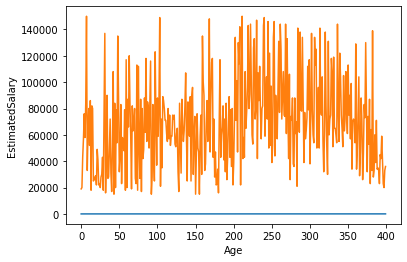

In [ ]:
plt.plot(dataset['Age'])
plt.plot(dataset['EstimatedSalary'])
         
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

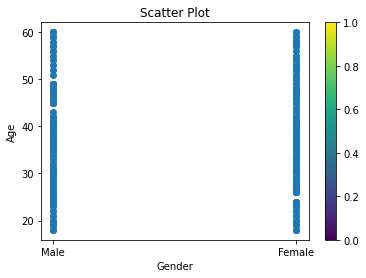

In [ ]:
plt.scatter(dataset['Gender'], dataset['Age'])

plt.title("Scatter Plot")


plt.xlabel('Gender')
plt.ylabel('Age')
plt.colorbar()
plt.show()